In [84]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv1D, LSTM, GRU, AveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [85]:
data_dir = 'C:/Users/Windows10/Desktop/코딩/data/bicoin_data/'

In [86]:
data_list = os.listdir(data_dir)
print(data_list)

['Aave.csv', 'Algorand.csv', 'ALL_COMBINED.csv', 'Avalanche.csv', 'Axie_Infinity.csv', 'Binance_Coin.csv', 'Binance_USD.csv', 'Bitcoin.csv', 'Bitcoin_BEP2.csv', 'Bitcoin_Cash.csv', 'Bitcoin_SV.csv', 'BitTorrent.csv', 'Cardano.csv', 'Chainlink.csv', 'Cosmos.csv', 'Crypto.com_Coin.csv', 'Dai.csv', 'Dash.csv', 'Dogecoin.csv', 'Elrond.csv', 'EOS.csv', 'Ethereum.csv', 'Ethereum_Classic.csv', 'Filecoin.csv', 'FTX_Token.csv', 'GRT.csv', 'ICP.csv', 'IOTA.csv', 'Klaytn.csv', 'Kusama.csv', 'LEO.csv', 'Litecoin.csv', 'Maker.csv', 'Monero.csv', 'Neo.csv', 'PancakeSwap.csv', 'Polkadot.csv', 'Polygon.csv', 'SHIBA_INU.csv', 'Solana.csv', 'Stellar.csv', 'Tether.csv', 'Tezos.csv', 'THETA.csv', 'Tron.csv', 'Uniswap.csv', 'USD_Coin.csv', 'VeChain.csv', 'Waves.csv', 'WBTC.csv', 'XPR.csv']


In [87]:
for data in data_list:
    csv_data = pd.read_csv(os.path.join(data_dir, data))
    print(data)
    print(csv_data.head())

Aave.csv
   SNo        Date  Price  Open  High   Low       Vol.  Change %
0    1  2018-01-30   0.15  0.17  0.17  0.14   530470.0     -7.95
1    2  2018-01-31   0.14  0.15  0.15  0.13   396050.0    -11.10
2    3  2018-02-01   0.11  0.14  0.14  0.11   987260.0    -17.46
3    4  2018-02-02   0.10  0.11  0.11  0.08  1810000.0     -8.32
4    5  2018-02-03   0.11  0.10  0.12  0.09  1200000.0      6.85
Algorand.csv
   SNo        Date   Price    Open    High     Low        Vol.  Change %
0    1  2019-07-25  0.6102  0.5983  0.6148  0.5860   4750000.0      1.95
1    2  2019-07-26  0.6503  0.6103  0.7111  0.5940   8950000.0      6.57
2    3  2019-07-27  0.5788  0.6501  0.6673  0.5728   9090000.0    -10.99
3    4  2019-07-28  0.5759  0.5788  0.5992  0.5584  11050000.0     -0.50
4    5  2019-07-29  0.5710  0.5770  0.5934  0.5546  11030000.0     -0.85
ALL_COMBINED.csv
  Currency_Name        Date  Price  Open  High   Low       Vol.  Change %
0          Aave  2018-01-30   0.15  0.17  0.17  0.14   5304

In [101]:
class data_preprocessing:
    def documentation(data_list):
        data_names = []
        for data in data_list:
            data_name = data[:-4]
            csv_data = os.path.join(data_dir, data)
            csv_data = pd.read_csv(csv_data)
            print('-'*50)
            print(data_name, csv_data.head(), sep = '\n')
            print('-'*50)
        return data_list

    def data_cleaning(data_list):
        all_combined = pd.read_csv(os.path.join(data_dir, 'ALL_COMBINED.csv'))
        data_list.remove('ALL_COMBINED.csv')
        erase_data = ['SNo', 'Vol.', 'Change %']
        for data in data_list:
            csv_data = pd.read_csv(os.path.join(data_dir, data))
            csv_data = csv_data.drop(erase_data, axis = 1)
            print(csv_data.head())

        return all_combined, data_list

    def data_visualize(data_list):
        plt.figure(figsize = (50, 50))
        cnt = 1
        for data in data_list:
            csv_data = pd.read_csv(os.path.join(data_dir, data))
            x = csv_data['Date']
            y = csv_data['Price']
            plt.subplot(10, 5, cnt)
            plt.plot(x, y, '-r')
            plt.title(data[:-4])
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.xticks(rotation = 90)
            cnt += 1
        plt.show()

In [97]:
data_names = data_preprocessing.documentation(data_list)

--------------------------------------------------
Aave
   SNo        Date  Price  Open  High   Low       Vol.  Change %
0    1  2018-01-30   0.15  0.17  0.17  0.14   530470.0     -7.95
1    2  2018-01-31   0.14  0.15  0.15  0.13   396050.0    -11.10
2    3  2018-02-01   0.11  0.14  0.14  0.11   987260.0    -17.46
3    4  2018-02-02   0.10  0.11  0.11  0.08  1810000.0     -8.32
4    5  2018-02-03   0.11  0.10  0.12  0.09  1200000.0      6.85
--------------------------------------------------
--------------------------------------------------
Algorand
   SNo        Date   Price    Open    High     Low        Vol.  Change %
0    1  2019-07-25  0.6102  0.5983  0.6148  0.5860   4750000.0      1.95
1    2  2019-07-26  0.6503  0.6103  0.7111  0.5940   8950000.0      6.57
2    3  2019-07-27  0.5788  0.6501  0.6673  0.5728   9090000.0    -10.99
3    4  2019-07-28  0.5759  0.5788  0.5992  0.5584  11050000.0     -0.50
4    5  2019-07-29  0.5710  0.5770  0.5934  0.5546  11030000.0     -0.85
-----

In [91]:
all_combined, data_list = data_preprocessing.data_cleaning(data_list)

         Date  Price  Open  High   Low
0  2018-01-30   0.15  0.17  0.17  0.14
1  2018-01-31   0.14  0.15  0.15  0.13
2  2018-02-01   0.11  0.14  0.14  0.11
3  2018-02-02   0.10  0.11  0.11  0.08
4  2018-02-03   0.11  0.10  0.12  0.09
         Date   Price    Open    High     Low
0  2019-07-25  0.6102  0.5983  0.6148  0.5860
1  2019-07-26  0.6503  0.6103  0.7111  0.5940
2  2019-07-27  0.5788  0.6501  0.6673  0.5728
3  2019-07-28  0.5759  0.5788  0.5992  0.5584
4  2019-07-29  0.5710  0.5770  0.5934  0.5546
         Date  Price  Open  High   Low
0  2020-12-25   2.95  3.12  3.12  2.90
1  2020-12-26   2.92  2.95  2.95  2.87
2  2020-12-27   2.90  2.92  3.03  2.90
3  2020-12-28   2.96  2.90  3.02  2.89
4  2020-12-29   2.92  2.96  2.96  2.87
         Date    Price     Open     High      Low
0  2021-07-22  24.8001  22.3979  25.8978  22.0230
1  2021-07-23  42.5999  24.9587  48.4640  24.2970
2  2021-07-24  44.6661  42.3589  47.5652  38.4593
3  2021-07-25  43.8368  42.9522  43.9611  38.8051
4  202

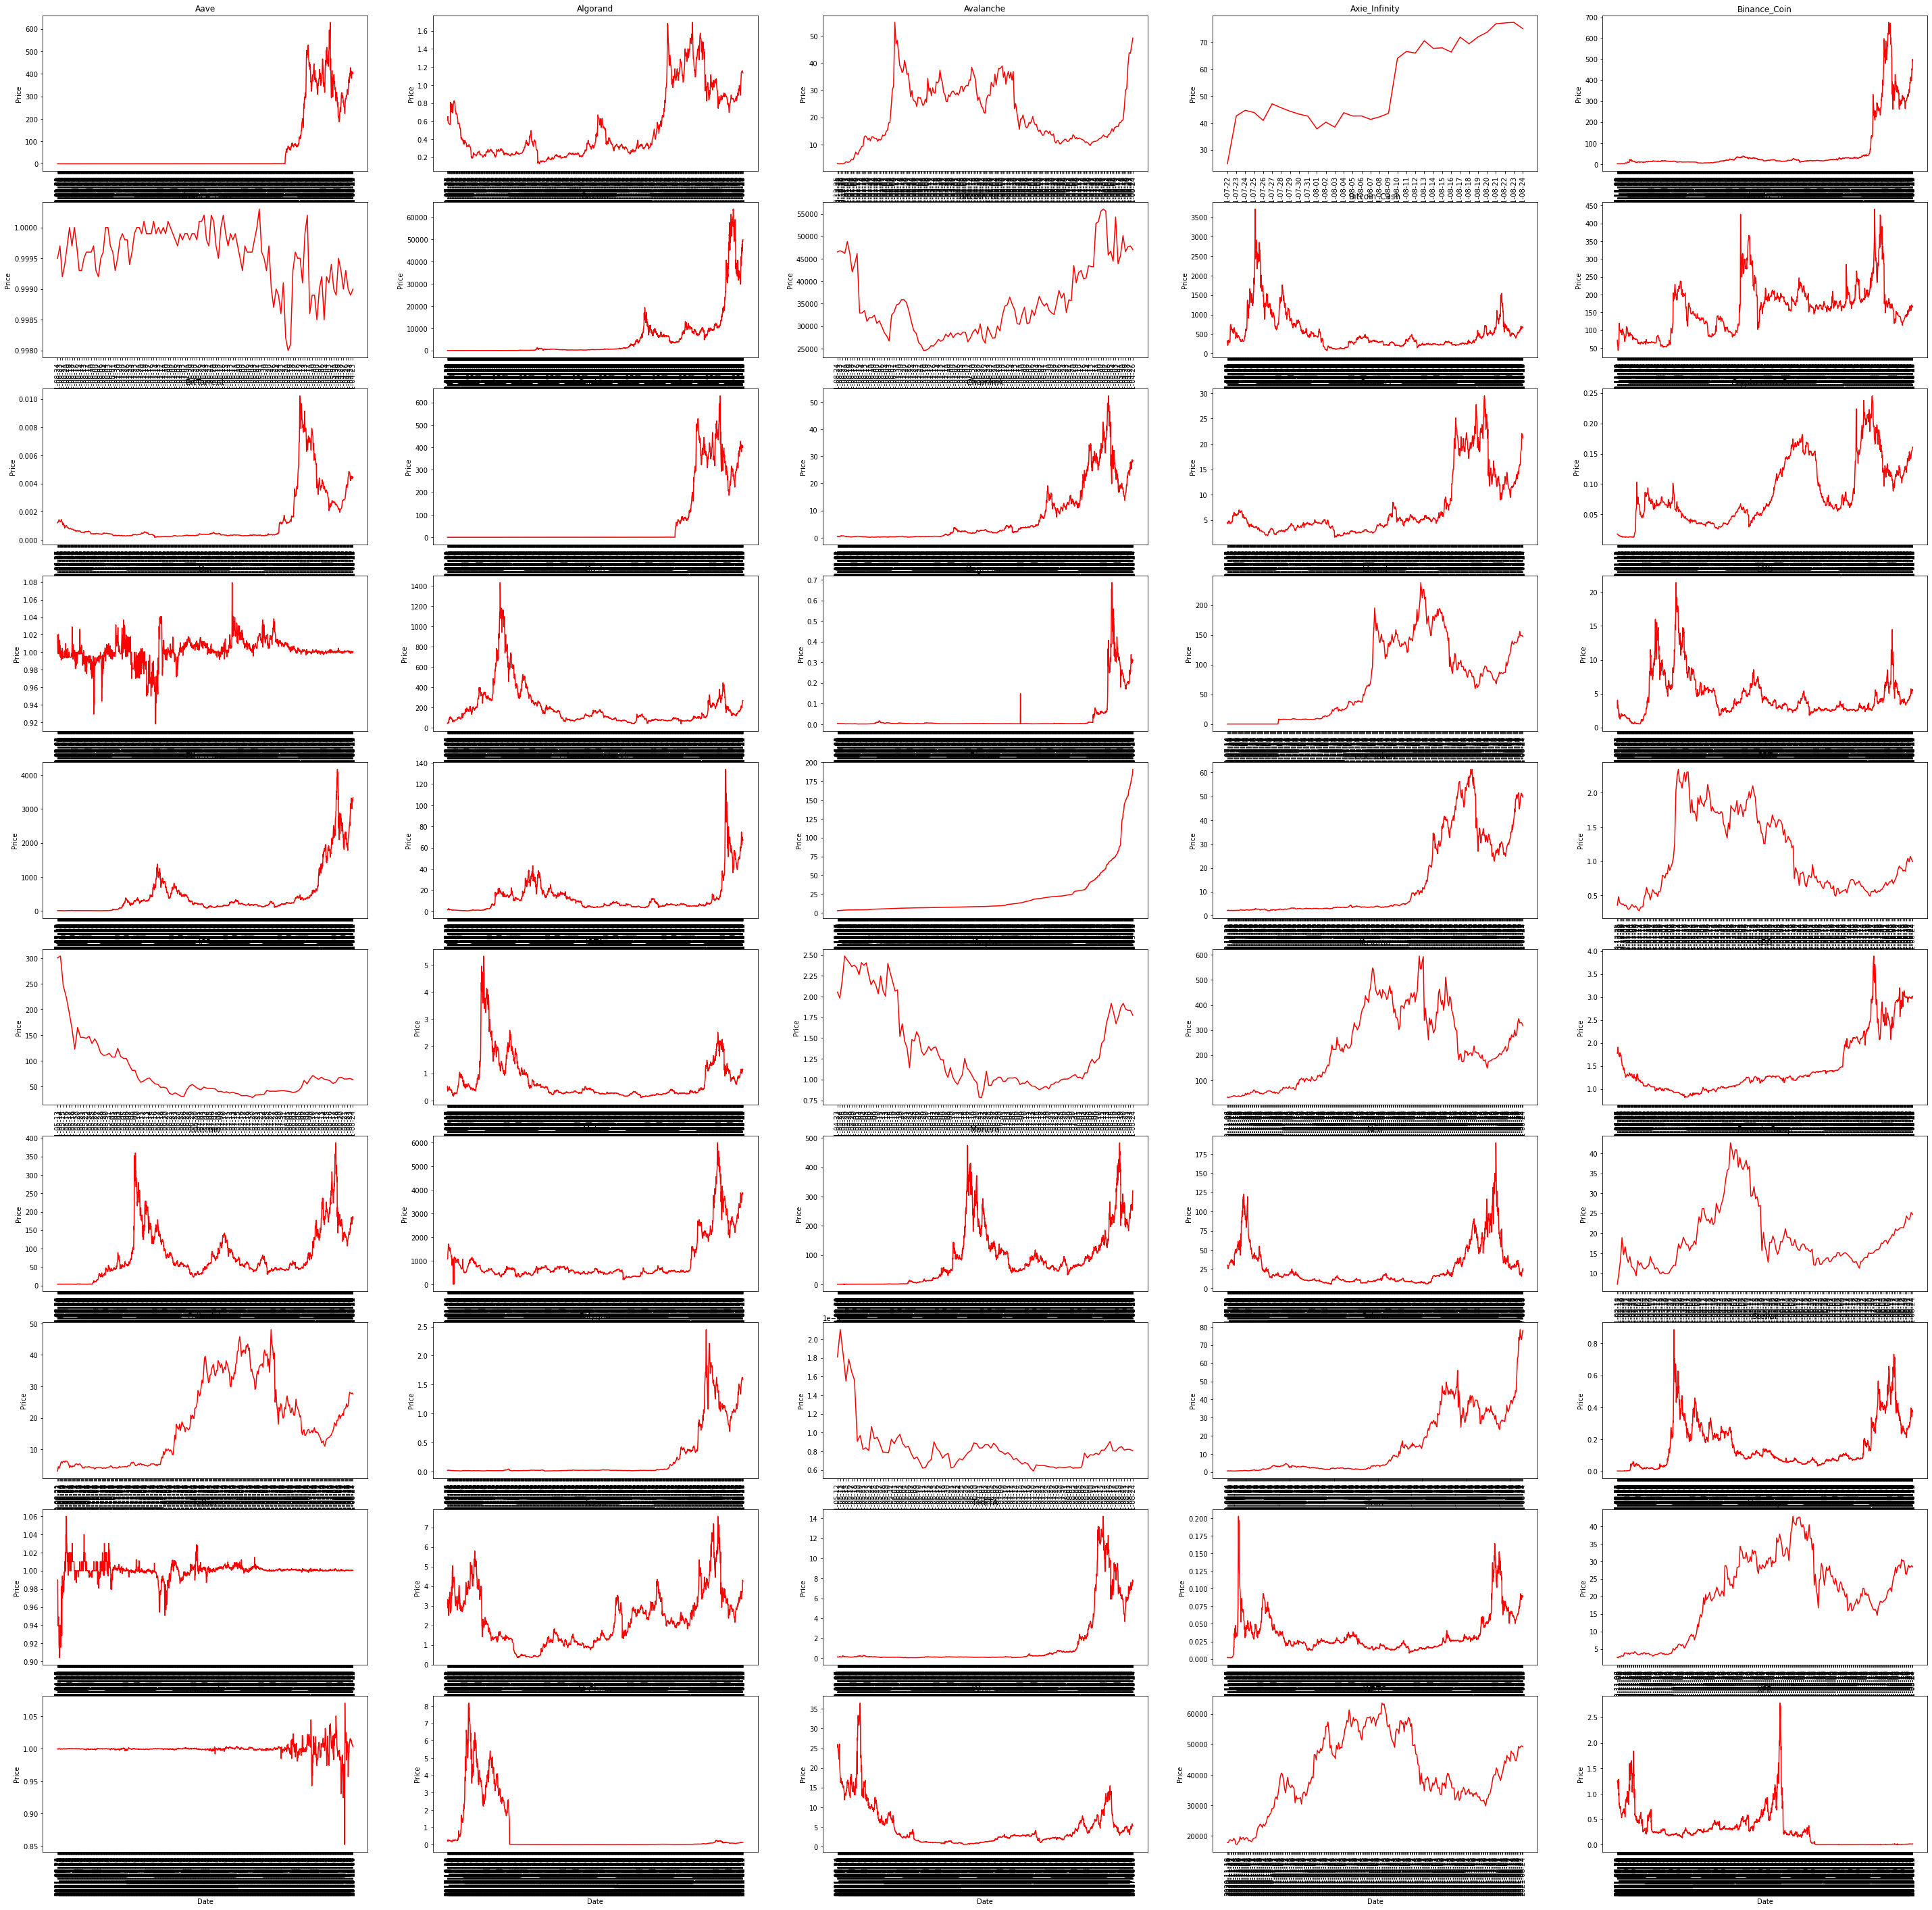

In [102]:
data_preprocessing.data_visualize(data_list)